In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.shape

(51717, 17)

In [6]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
df = df.drop(['address','phone','dish_liked','listed_in(city)', 'cuisines', 'reviews_list', 'menu_item'],axis=1)
df.head()

,url,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type)
0,https://www.zomato.com/bangalore/jalsa-banasha...,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,800,Buffet
1,https://www.zomato.com/bangalore/spice-elephan...,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,800,Buffet
2,https://www.zomato.com/SanchurroBangalore?cont...,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining",800,Buffet
3,https://www.zomato.com/bangalore/addhuri-udupi...,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,300,Buffet
4,https://www.zomato.com/bangalore/grand-village...,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,600,Buffet


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   name                         51717 non-null  object
 2   online_order                 51717 non-null  object
 3   book_table                   51717 non-null  object
 4   rate                         43942 non-null  object
 5   votes                        51717 non-null  int64 
 6   location                     51696 non-null  object
 7   rest_type                    51490 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


### Data Cleaning

In [12]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [13]:
def cleaned_rate_column(value):
    
    if (value == 'NEW' or value == '-'):
        return np.nan
    else:
        value=str(value).split('/')
        value = value[0]
        return float(value)

In [15]:
df['rate']= df['rate'].apply(cleaned_rate_column)

In [16]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [18]:
df.isnull().sum()

url                                0
name                               0
online_order                       0
book_table                         0
rate                           10052
votes                              0
location                          21
rest_type                        227
approx_cost(for two people)      346
listed_in(type)                    0
dtype: int64

In [22]:
df['rate'].fillna(np.round(df.rate.mean(),2),inplace=True)

In [23]:
df.isnull().sum()

url                              0
name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        21
rest_type                      227
approx_cost(for two people)    346
listed_in(type)                  0
dtype: int64

In [24]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [26]:
(21+227+346)/len(df)

0.011485585010731481

In [27]:
df = df.dropna()

In [28]:
df.isnull().sum()

url                            0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [30]:
df.duplicated().sum()

0

In [31]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [34]:
def clean_approx_cost(val):
    val = str(val)
    if ',' in val:
        val = val.replace(',','')
        val = float(val)
    else:
        return float(val)

In [36]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].apply(clean_approx_cost)

In [37]:
df['approx_cost(for two people)'].unique()

array([800., 300., 600., 700., 550., 500., 450., 650., 400., 900., 200.,
       750., 150., 850., 100.,  nan, 350., 250., 950., 199.,  80., 160.,
       230., 130.,  50., 190., 180., 330.,  40., 120., 469.,  70.,  60.,
       560., 240., 360., 140.])

In [41]:
restaurant_type = df['rest_type'].value_counts()
type_below_1000 = restaurant_type[restaurant_type<1000]
type_below_1000

rest_type
Beverage Shop                 867
Bar                           686
Food Court                    619
Sweet Shop                    468
Bar, Casual Dining            415
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: count, Length: 85, dtype: int64

In [42]:
def clean_rest_type(val):
    if (val in type_below_1000):
        return 'Others'
    else:
        return val

In [44]:
df['rest_type'] = df['rest_type'].apply(clean_rest_type)
df['rest_type'].value_counts()

rest_type
Quick Bites           19048
Casual Dining         10275
Others                 9032
Cafe                   3687
Delivery               2587
Dessert Parlor         2245
Takeaway, Delivery     2016
Bakery                 1141
Casual Dining, Bar     1136
Name: count, dtype: int64

In [45]:
df.head()

,url,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type)
0,https://www.zomato.com/bangalore/jalsa-banasha...,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,800.0,Buffet
1,https://www.zomato.com/bangalore/spice-elephan...,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,800.0,Buffet
2,https://www.zomato.com/SanchurroBangalore?cont...,San Churro Cafe,Yes,No,3.8,918,Banashankari,Others,800.0,Buffet
3,https://www.zomato.com/bangalore/addhuri-udupi...,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,300.0,Buffet
4,https://www.zomato.com/bangalore/grand-village...,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,600.0,Buffet


In [46]:
df['location'].value_counts()

location
BTM                      5071
HSR                      2496
Koramangala 5th Block    2481
JP Nagar                 2219
Whitefield               2117
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64

In [48]:
res_loc = df['location'].value_counts()
loc_below_500 = res_loc[res_loc<500]

In [49]:
def cleaned_location(val):
    if val in loc_below_500:
        return 'Others'
    else:
        return val

In [50]:
df['location'] = df['location'].apply(cleaned_location)
df['location'].value_counts()

location
Others                   8021
BTM                      5071
HSR                      2496
Koramangala 5th Block    2481
JP Nagar                 2219
Whitefield               2117
Indiranagar              2033
Jayanagar                1916
Marathahalli             1811
Bannerghatta Road        1611
Bellandur                1271
Electronic City          1249
Koramangala 1st Block    1237
Brigade Road             1218
Koramangala 7th Block    1176
Koramangala 6th Block    1129
Sarjapur Road            1049
Ulsoor                   1017
Koramangala 4th Block    1017
Banashankari              906
MG Road                   894
Kalyan Nagar              843
Richmond Road             804
Malleshwaram              724
Frazer Town               720
Basavanagudi              684
Residency Road            674
Brookefield               656
Banaswadi                 645
New BEL Road              644
Kammanahalli              640
Rajajinagar               591
Church Street             569
L

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51167 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51167 non-null  object 
 1   name                         51167 non-null  object 
 2   online_order                 51167 non-null  object 
 3   book_table                   51167 non-null  object 
 4   rate                         51167 non-null  float64
 5   votes                        51167 non-null  int64  
 6   location                     51167 non-null  object 
 7   rest_type                    51167 non-null  object 
 8   approx_cost(for two people)  44254 non-null  float64
 9   listed_in(type)              51167 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


In [52]:
df['listed_in(type)'].value_counts()

listed_in(type)
Delivery              25669
Dine-out              17586
Desserts               3559
Cafes                  1703
Drinks & nightlife     1091
Buffet                  871
Pubs and bars           688
Name: count, dtype: int64

In [53]:
df['approx_cost(for two people)'].value_counts()

approx_cost(for two people)
300.0    7549
400.0    6525
500.0    4940
200.0    4846
600.0    3693
250.0    2943
800.0    2285
150.0    2050
700.0    1939
350.0    1752
450.0    1415
100.0     993
650.0     772
750.0     758
550.0     757
900.0     698
850.0     166
950.0      62
120.0      24
180.0      20
80.0       10
230.0      10
130.0       8
50.0        8
40.0        8
330.0       4
199.0       4
70.0        3
190.0       2
240.0       2
360.0       2
140.0       2
160.0       1
469.0       1
60.0        1
560.0       1
Name: count, dtype: int64

### Restaurants delivering Online or Not

In [57]:
#df['online_order'].value_counts().plot(kind='bar',color = sns.color_palette())

Text(0.5, 1.0, 'Restaurants delivering Online or Not')

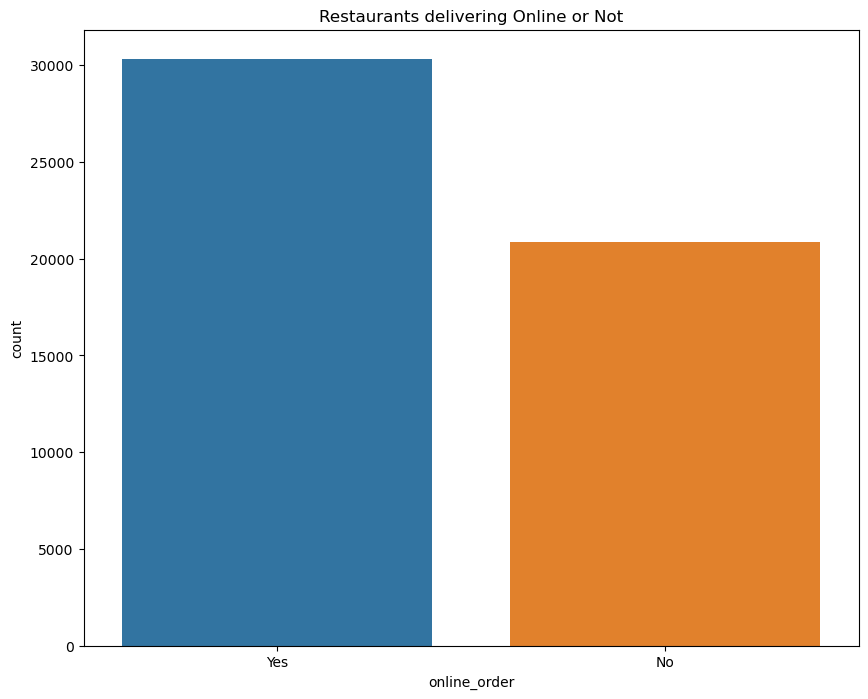

In [58]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='online_order')
plt.title('Restaurants delivering Online or Not')

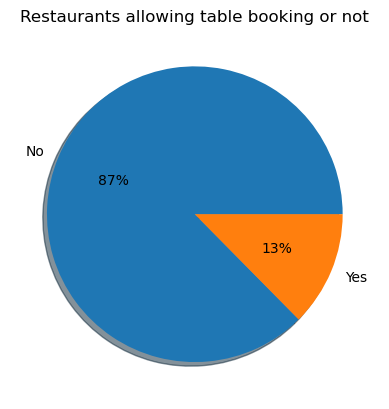

In [69]:
plt.pie(df['book_table'].value_counts().values, labels = df['book_table'].value_counts().index, autopct='%1.0f%%', shadow=True)
plt.title('Restaurants allowing table booking or not')
plt.show()

In [70]:
df['book_table'].value_counts()

book_table
No     44718
Yes     6449
Name: count, dtype: int64

In [75]:
avg_rate_with_booking = np.round(df[df['book_table'] == 'Yes']['rate'].mean(),2)
avg_rate_without_booking = np.round(df[df['book_table'] == 'No']['rate'].mean(),2)

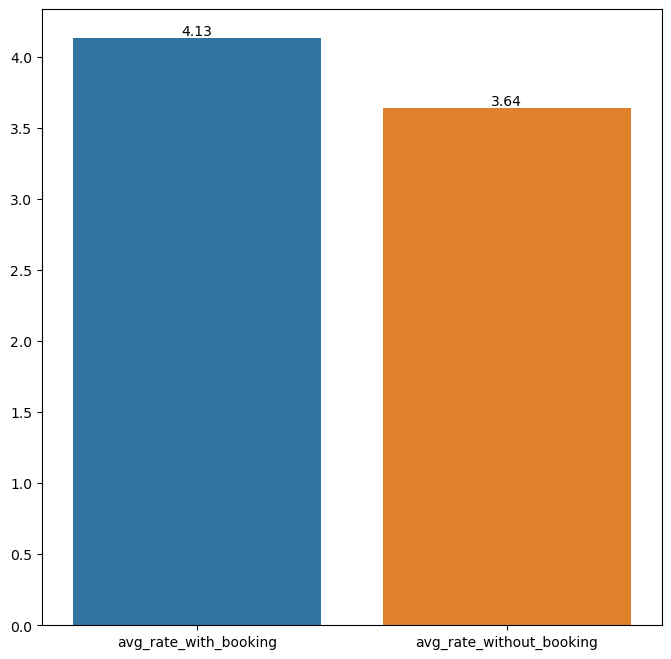

In [87]:
dict1 = {'avg_rate_with_booking':[avg_rate_with_booking], 'avg_rate_without_booking':[avg_rate_without_booking]}
df2 = pd.DataFrame.from_dict(dict1)

fig, ax = plt.subplots(figsize = (8,8))
sns.barplot(data=df2)
ax.set_xticklabels(ax.get_xticklabels())
for i in ax.containers:
    ax.bar_label(i)


In [90]:
loc_df = pd.DataFrame(df.groupby('location')['rate'].mean())

<Axes: xlabel='location'>

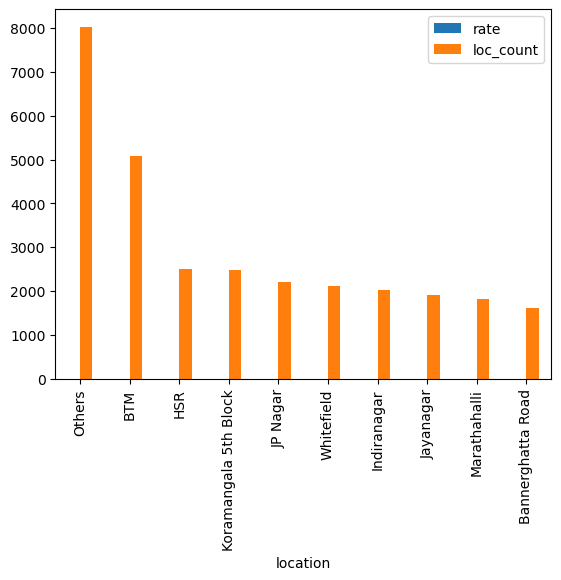

In [96]:
loc_df['loc_count'] = df['location'].value_counts()
loc_df.sort_values(by=['loc_count','rate'],ascending=False).head(10).plot(kind='bar')

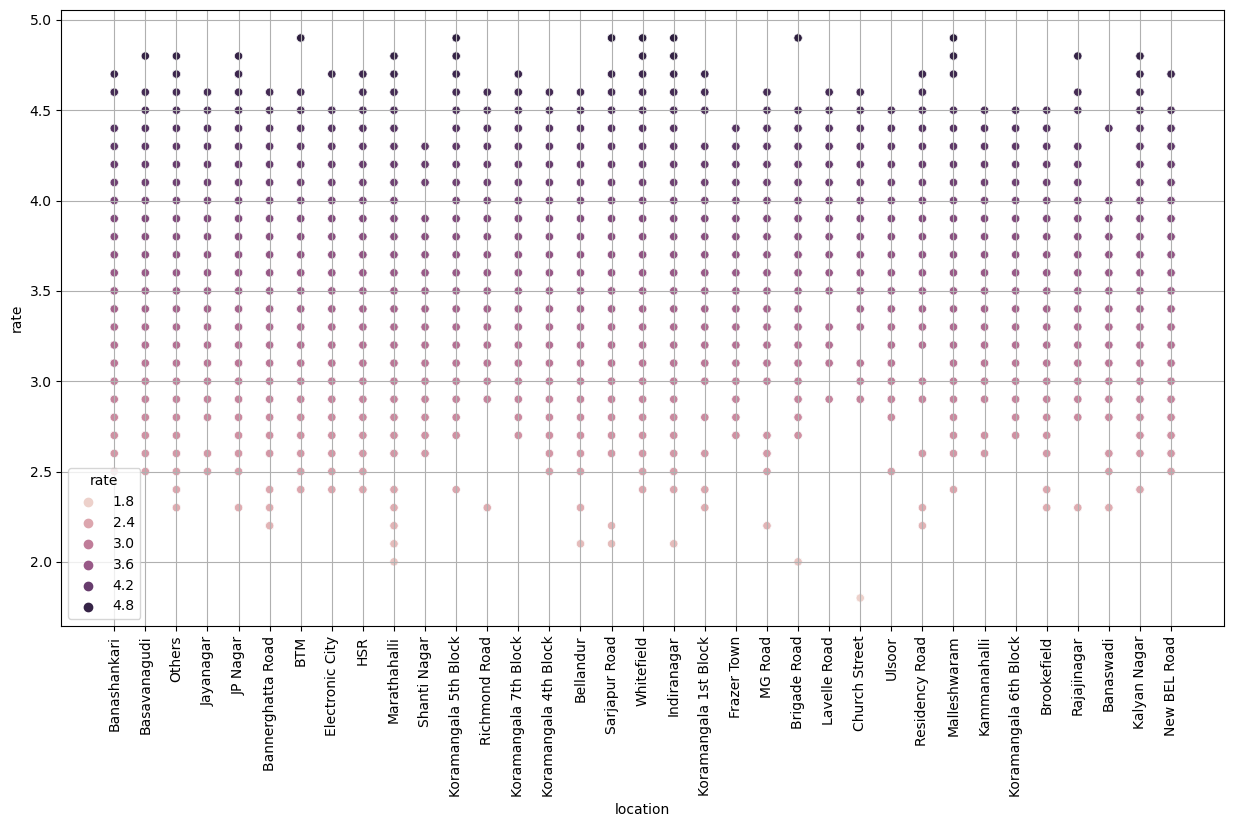

In [99]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='location',y='rate', hue='rate')
plt.xticks(rotation=90)
plt.grid()
plt.show()

### Restaurant Type

In [100]:
df['rest_type'].value_counts()

rest_type
Quick Bites           19048
Casual Dining         10275
Others                 9032
Cafe                   3687
Delivery               2587
Dessert Parlor         2245
Takeaway, Delivery     2016
Bakery                 1141
Casual Dining, Bar     1136
Name: count, dtype: int64

<Axes: ylabel='rest_type'>

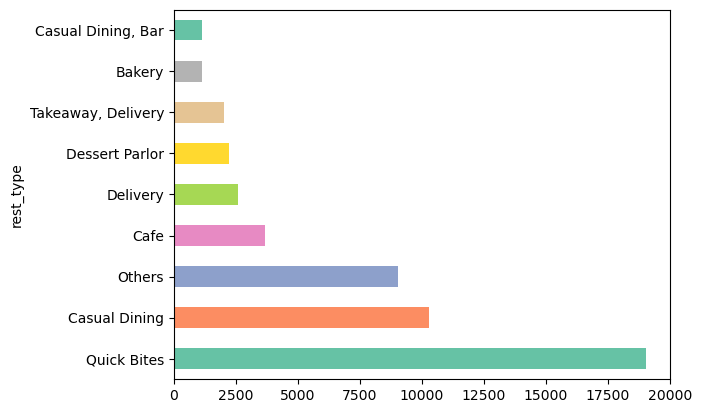

In [103]:
df['rest_type'].value_counts().plot(kind='barh',color=sns.color_palette('Set2'))

<Axes: ylabel='listed_in(type)'>

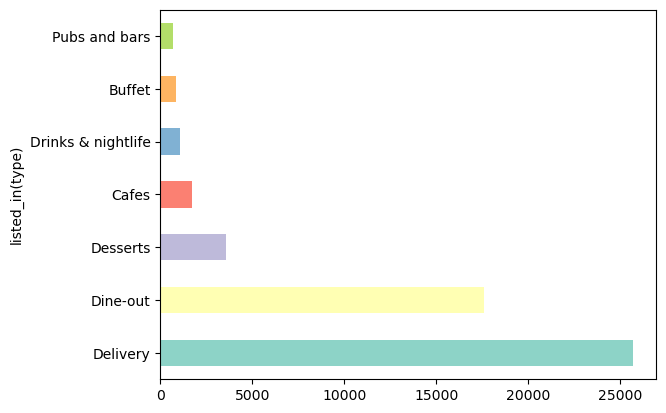

In [106]:
df['listed_in(type)'].value_counts().plot(kind='barh',color=sns.color_palette('Set3'))

<Axes: xlabel='rate'>

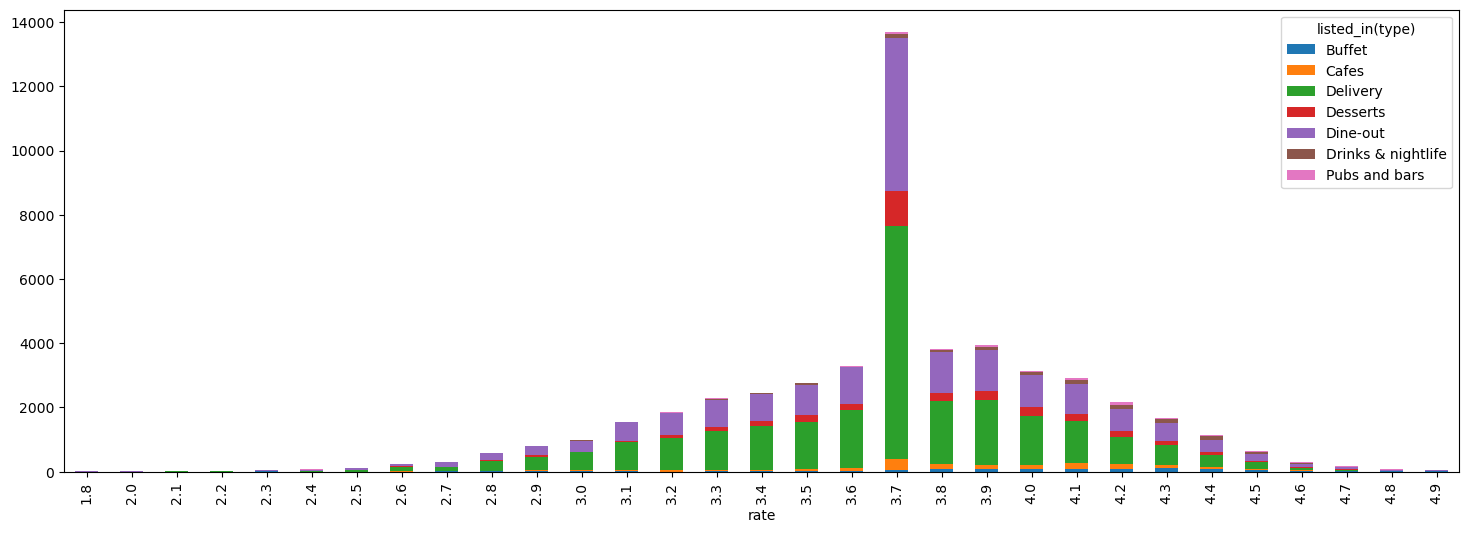

In [109]:
pd.crosstab(df['rate'],df['listed_in(type)']).plot(kind='bar', stacked=True, figsize = (18,6))

In [110]:
df.head(2)

,url,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type)
0,https://www.zomato.com/bangalore/jalsa-banasha...,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,800.0,Buffet
1,https://www.zomato.com/bangalore/spice-elephan...,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,800.0,Buffet


In [116]:
res_cost = df['approx_cost(for two people)'].groupby(df['name'], sort=True)

dict2 = {}

for i,j in df['name'].value_counts()[:10].to_dict().items():
    dict2[i] = np.round(res_cost.get_group(i).mean(),2)
    

In [118]:
cost_df = pd.DataFrame(list(dict2.items()),columns=['Rest Name','Avg cost of 2 people'])

<Axes: xlabel='Avg cost of 2 people', ylabel='Rest Name'>

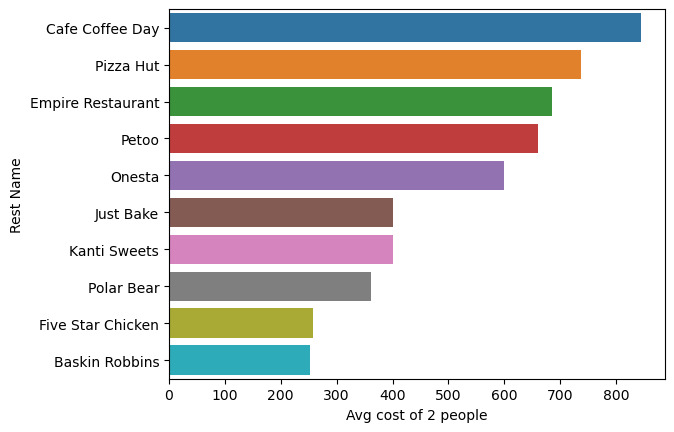

In [120]:
sns.barplot(data=cost_df.sort_values(by=['Avg cost of 2 people'], ascending= False),x='Avg cost of 2 people',y='Rest Name')

<Axes: xlabel='location'>

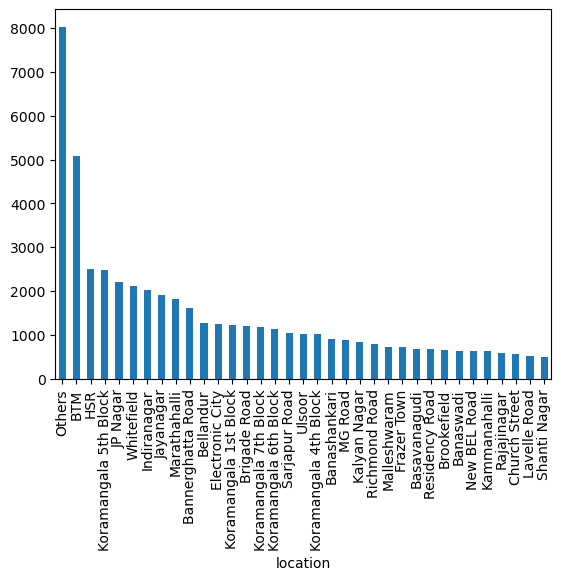

In [121]:
# No of restaurants in a Location

df['location'].value_counts().plot(kind='bar')